In [1]:
# Import Libraries
import matplotlib.pyplot as plt

In [2]:
# Read the dataset
def read_csv(csv_file):
    with open(csv_file, 'r') as file:
        data_list = []
        for line in file:
            rows = line.split(',')
            data_list.append(rows)
    return data_list
data = read_csv('export.csv')

# Create list of "distinct" data points. [ This is important, my code doesn't seem to work properly if there is duplicate points. Sorry about that.]
x = list(set([(float(i[0]),float(i[1])) for i in data[1:]]))


In [3]:
# Calculate Distance between Two Data Points.
def dist(x,y):
    return (sum([(i - j) ** 2 for i, j in zip(x, y)]))**0.5

In [4]:
# Create distance matrix.
dist_mat = {}
for i in range(len(x)):
    for j in range(len(x)):
        if i<=j:
            dist_mat[x[i],x[j]] = dist(x[i],x[j])
            dist_mat[x[j],x[i]] = dist_mat[x[i],x[j]]

In [5]:
# Check if a data point is a core point and return its neighbours

def is_core(p, eps, k):
    n = []
    for i in x:
        if i !=  p:
            if dist_mat[i,p] <= eps:
                n.append(i)
    if len(n) < k:
        return [False, n]
    else:
        return [True, n]

In [6]:
# The DBSCAN Algorithm.

def dbscan(x,eps,k):
    # Initialize the set of clusters.
    clusters = []
    # Create a list of all not_visited data points.
    not_visited = x.copy()
    # If a data point is not visited,
    for i in not_visited:  
        # check if it is a core point. 
        core = is_core(i,eps,k)
        # If it is a core point,
        if core[0] == True:
            # initialize a cluster.
            cluster = []
            # Remove the point from not_visited
            not_visited.remove(i)
            # and add it to cluster.
            cluster.append(i)
            # Now consider all its neighbours.
            for s in core[1]:
                # Remove the neighbours from not visited
                not_visited.remove(s)
                # and append them to the cluster.
                cluster.append(s)
            # Now for all the items in cluster,
            for j in cluster:
                # if it is in not_visited,
                if j in not_visited:
                    # remove them from not_visited.
                    not_visited.remove(j)
                # Check if that item in cluster is a core point.
                core1 = is_core(j,eps,k)
                # If it is core,
                if core1[0] == True:
                    # find all its neighbours.
                    for t in core1[1]:
                        # If its neighbour is not allready in cluster
                        if t not in cluster:
                            # add it to the cluster.
                            cluster.append(t)
            # Add the cluster to cluster set.
            clusters.append(cluster)
        # And continue to loop it on the not_visited list until all the core points are visited.
    return clusters


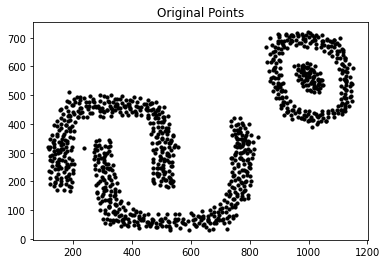

In [7]:
# Plot the original data points.

plt.scatter(*zip(*x),c='black',s=10)
plt.title('Original Points')
plt.show()

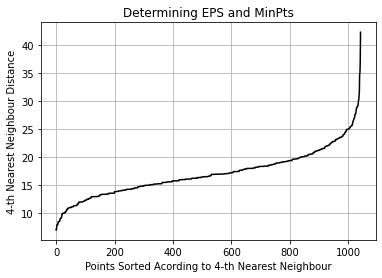

In [8]:
# Set min_points.
min_pts = 4

# Function to determine k-th nearest distance of points.
def nearest_dist(p,k):
    l = [dist_mat[p,i] for i in x]
    return sorted(l)[k]

# Sort Points Acording to k-th Nearest Neighbour.
d = sorted([nearest_dist(p,min_pts) for p in x])

# Plot the graph to determine Eps.
plt.plot(range(len(d)),d,c='black')
plt.grid()
plt.title('Determining EPS and MinPts')
plt.ylabel('4-th Nearest Neighbour Distance')
plt.xlabel('Points Sorted Acording to '+ str(min_pts) +'-th Nearest Neighbour')
plt.show()

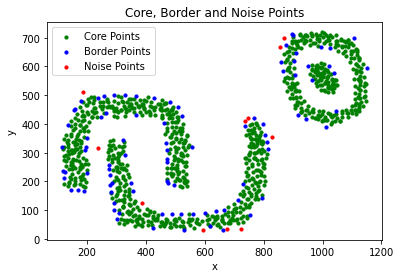

In [9]:
# Set the value of Eps from the above graph.
eps = 22.5

# Get all types of data points present in dataset i.e. Core, Border and Noise points.
point_types = {}
point_types['Core Points'] = []
point_types['Border Points'] = []
point_types['Noise Points'] = []

# Core Points.
for i in x:
    if is_core(i,eps,min_pts)[0] == True:
        point_types['Core Points'].append(i)

# Border Points.
for i in x:
    core2 = is_core(i,eps,min_pts)
    # If the point is not core
    if core2[0] == False:
        for j in core2[1]:
            # and it has atleast one neighbour which is core.
            if j in point_types['Core Points']:
                point_types['Border Points'].append(i)
                break

# Noise Points.
for i in x:
    # If it is neither core or border.            
        if i not in point_types['Core Points']:
            if i not in point_types['Border Points']:
                point_types['Noise Points'].append(i)

# Plot different types of points.
color=['green','blue','red']
i = 0
for k,v in point_types.items():
    plt.scatter(*zip(*v),c=color[i],s=10, label = k)
    i = i+1
plt.xlabel('x')
plt.ylabel('y')
plt.title('Core, Border and Noise Points')
plt.legend()
plt.show()

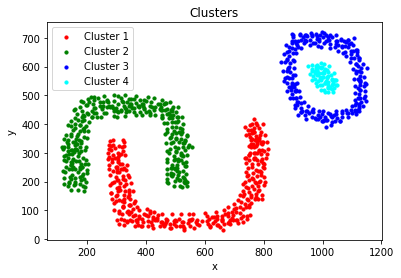

In [10]:
# Perform DBSCAN on dataset
z = dbscan(x,eps,min_pts)

# Finally Plot the Clusters.
color=['red','green','blue','cyan','orange','yellow','magenta','black','purple','violet']
i = 0
for v in z:
    plt.scatter(*zip(*v), c=color[i], s=10, label='Cluster '+str(i+1))
    i = i+1
plt.xlabel('x')
plt.title('Clusters')
plt.ylabel('y')
plt.legend()
plt.show()